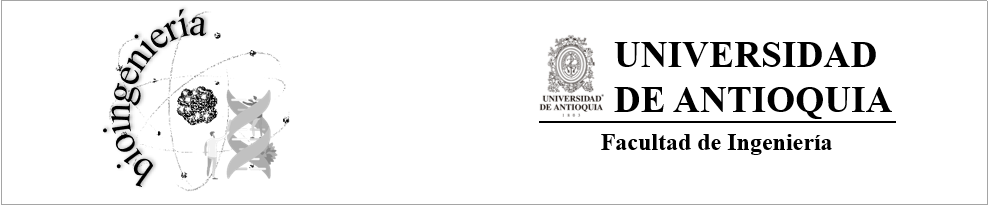

#  **Regresión Lineal**

- La regresión lineal es una de las técnicas más usadas en Machine Learning.
- Su fortaleza: Simplicidad e Interpretabilidad.

La regresión lineal es una técnica $paramétrica$ de machine learning. El término $paramétrico$, quiere decir que: requiere unos elementos adicionales a los datos que deben ser calculados.


En el caso que estemos usando una sola variable, $x$, sabemos que una línea necesita 2 parámetros. La fórmula para la regresión lineal con una sola variable $x$ es:
#$y\ =\ m*x\ +\ b$
donde: <br>
$m$ : <i>pendiente</i> - grado de inclinación de la recta con respecto al eje $x$ <br>
$b$ : <i>intercepto</i> - punto en el que la recta corta el eje $y$ cuando $x\ =\ 0$ <br>


El aprendizaje consiste en encontrar cuáles son los mejores parámetros (coeficientes) para los datos que tengamos. Los mejores coeficientes serán los que $minimicen$ la $medida\ de\ error$ que se esté usando.

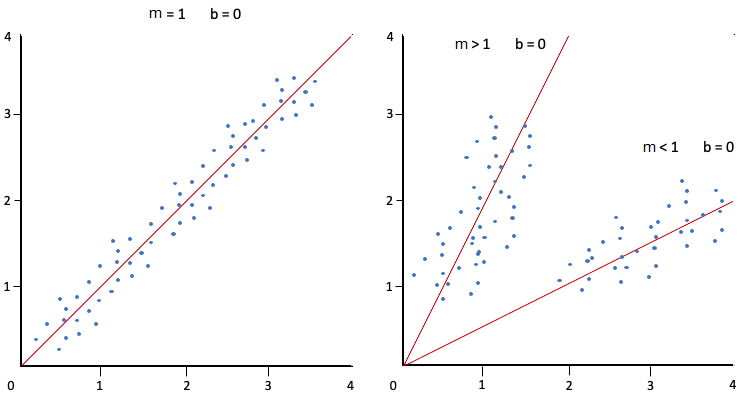

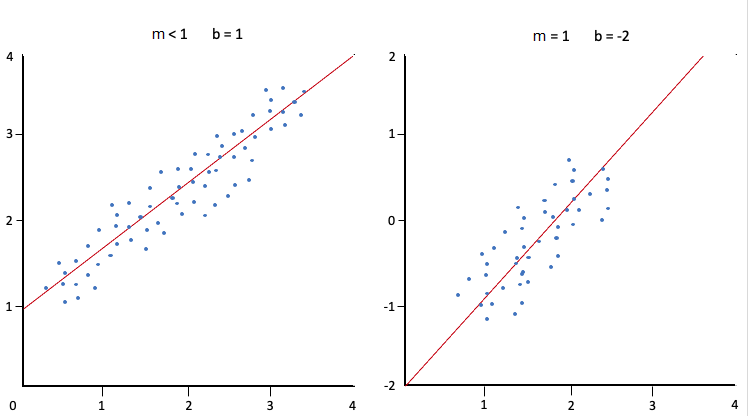

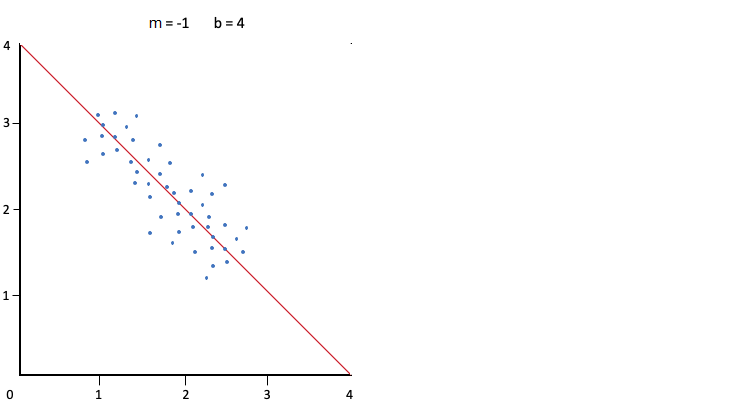

## Generación de datos

### $y\ =\ 0.1x\ +\ 1.25\ +\ N(0,0.2)$

#### Importación de librerías para carga y visualización de los datos

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

#### Función y graficación de los datos simulador

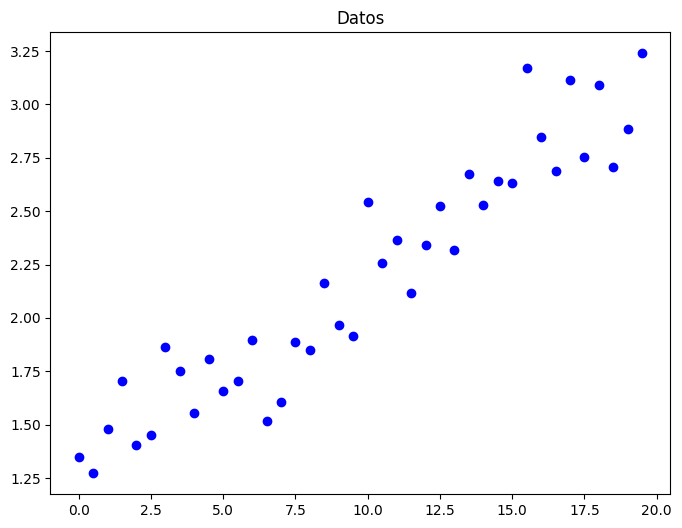

In [35]:
def f(x):  # función f(x) = 0.1*x + 1.25 + 0.2*Ruido_Gaussiano
    np.random.seed(42) # para poder reproducirlo
    y = 0.1*x + 1.25 + 0.2*np.random.randn(x.shape[0])
    return y

x = np.arange(0, 20, 0.5) # generamos valores x de 0 a 20 en intervalos de 0.5
y = f(x) # calculamos y a partir de la función que hemos generado

# hacemos un gráfico de los datos que hemos generado
plt.figure(figsize=(8,6))
plt.scatter(x , y , label='data', color='blue')
plt.title('Datos');
plt.show()

## Entrenando un modelo de Regresión Lineal en python

Scikit-Learn LinearRegression (https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LinearRegression.html)

In [ ]:
# Importación de la clase de Regresión Lineal de scikit-learn
from sklearn.linear_model import LinearRegression

# Creación de una instancia de LinearRegression
regresion_lineal = LinearRegression()

# entrenamiento de la regresión lineal que aprenda de los datos (x,y)
regresion_lineal.fit(x.reshape(-1,1), y)

# Hallar los parámetros (m: pendiente  y b: intercepto) que ha estimado la regresión lineal
print('m = ' + str(regresion_lineal.coef_) + ', b = ' + str(regresion_lineal.intercept_))



### Comparación de las ecuaciones: Generativa vs Estimada

### $y\ =\ 0.1·x\ +\ 1.25\ +\ N(0,0.2)$
### $y\ =\ 0.09183522·x\ +\ 1.2858792525736682$

## Prediciendo con Regresión Lineal en python


In [ ]:
# vamos a predicir y = regresion_lineal(5)
nuevo_x = np.array([5])
prediccion = regresion_lineal.predict(nuevo_x.reshape(-1,1))
print(prediccion)

#### ¿Qué quiere decir lo anterior?
Que a un valor de $x\ =\ 5$ le corresponderá un resultado de $y\ =\ 1.7449$

## ¿Qué tanto se equivocó mi sistema
### Error Cuadrático Medio - Mean Squared Error (MSE)

In [ ]:
# importamos el cálculo del error cuadrático medio (MSE)
from sklearn.metrics import mean_squared_error

# Predecimos los valores para los datos usados en el entrenamiento
prediccion_entrenamiento = regresion_lineal.predict(x.reshape(-1,1))

# Calculamos el Error Cuadrático Medio (MSE = Mean Squared Error)
mse = mean_squared_error(y_true = y, y_pred = prediccion_entrenamiento)

# La raíz cuadrada del MSE es el RMSE
rmse = np.sqrt(mse)

print('Error Cuadrático Medio (MSE) = ' + str(mse))
print('Raíz del Error Cuadrático Medio (RMSE) = ' + str(rmse))

## Otro estadístico
### Coeficiente de determinación $R^2$
El rango de $R^2$ está entre 0 y 1, siendo 1 lo mejor

In [ ]:
# calculamos el coeficiente de determinación R2
r2 = regresion_lineal.score(x.reshape(-1,1), y)
print('Coeficiente de Determinación R2 = ' + str(r2))

### Se grafican los datos y la recta que mejor describe el comportamiento de estos, es decir la que el algoritmo de $Regresión\ Lineal$ halló

In [ ]:
def fmodel(x):  # función f(x) = 0.1*x + 1.25
    w = 0.09183522
    b = 1.2858792525736682
    y = w*x + b
    return y

# Línea de tendencia hallada con los valores m y b que arrojó el modelo Linear_Regression
x_model = np.arange(0, 20, 0.5) # generamos valores x de 0 a 20 en intervalos de 0.5
y_model = fmodel(x_model) # calculamos y a partir de la función fmodel()


# Se crea la nube de puntos con la función f(x) previa.
x = np.arange(0, 20, 0.5) # generamos valores x de 0 a 20 en intervalos de 0.5
y = f(x) # calculamos y a partir de la función que hemos generado

# Gráfico con los datos generado y la línea de tendencia
plt.figure(figsize=(6,4))
plt.scatter(x , y , label='data', color='blue')
plt.plot(x_model , y_model , color='red')
plt.title('Datos');
plt.show()

# Forma general de la ecuación de la recta en problemas multivariados

## $y\ = \beta_0\ +\ \beta_1·x_1\ +\ \beta_2·x_2\ ...\ +\ \beta_p·x_p + \epsilon$

## $y\ = \beta_0\ +\ \sum_{i=1} \ \beta_i·x_i + \epsilon_i$

# Ejercicio práctico

1. Importación de librerías a usar para carga y visualización de datos

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

2. Cargar y visualizar los datos

In [ ]:
!wget https://raw.githubusercontent.com/angelower/infomed20251/main/data/articulos_ml.xlsx

df = pd.read_excel('articulos_ml.xlsx')
df.head()

3. Análisis estadítico de los datos

In [ ]:
df.describe()

In [ ]:
df.isnull().sum()

## Gráfica de $shares$ vs $word\ count$

In [ ]:
f1 = df['Word count'].values
f2 = df['# Shares'].values

colores=['orange' , 'blue']

asignar =[]
for index , row in df.iterrows():
    if(row['Word count'] > 1808):
        asignar.append('orange')
    else:
        asignar.append('blue')

plt.subplots(figsize=(16,7))
plt.scatter(f1,f2 , c=asignar)
plt.xlabel('Word count')
plt.ylabel('# Shares')
plt.show()

Se pueden presentar datos atípicos (outliers)

In [ ]:
filter_data = df[(df['Word count']<=3500) & (df['# Shares']<= 100000)]

f1 = filter_data['Word count'].values
f2 = filter_data['# Shares'].values

asignar =[]
for index , row in filter_data.iterrows():
    if(row['Word count'] > 1808):
        asignar.append('orange')
    else:
        asignar.append('blue')

plt.subplots(figsize=(16,7))
plt.scatter(f1,f2 , c=asignar)
plt.xlabel('Word count')
plt.ylabel('# Shares')
plt.show()

## Modelado de ML para predicción

In [ ]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error , r2_score

In [ ]:
dataX = filter_data[['Word count']]
X_train = np.array(dataX)
y_train = filter_data['# Shares'].values

regr = LinearRegression()

regr.fit(X_train , y_train)

y_pred = regr.predict(X_train)

print(f"w = {regr.coef_}")
print(f"b =  {regr.intercept_}")
print(f"MSE = {mean_squared_error(y_train , y_pred)}")
print(f"R2 = {r2_score(y_train , y_pred)}")

In [ ]:
def fmodel(x):
    w = 7.58137239
    b = 9254.614840711285
    y = w*x + b
    return y

x_model = np.arange(0,3500,1)
y_model = fmodel(x_model)

plt.subplots(figsize=(10,5))
plt.scatter(f1 , f2 , c=asignar)
plt.plot(x_model , y_model , color='red')
plt.show()

In [ ]:
val_pred = regr.predict([[2050]])
val_pred

In [ ]:
def fmodel(x):
    w = 7.58137239
    b = 9254.614840711285
    y = w*x + b
    return y

x_model = np.arange(0,3500,1)
y_model = fmodel(x_model)

plt.subplots(figsize=(16,9))
plt.scatter(f1 , f2 , c=asignar)
plt.yticks(range(0, 110000 , 5000))
plt.plot(x_model , y_model , color='red')
plt.hlines(y=val_pred , xmin=0 , xmax=2200, linestyles='--')
plt.vlines(x=2050 , ymin=0 , ymax=30000, linestyles='--')
plt.show()

## Modelo de ML para predicción utilizando sistema multivariado

In [ ]:
dataX2 = pd.DataFrame()
# dataX2['Word count'] = filter_data['Word count']
# dataX2['Elapsed days'] = filter_data['Elapsed days']

datos_sumados = (filter_data['# of Links']
                 + filter_data['# Images video']
                 + filter_data['# of comments'].fillna(0)
                 + filter_data['Elapsed days'] )

dataX2['datos_sumados'] = datos_sumados
dataX2.head()

In [ ]:
# PASO #1: Armar la Data
dataX2 = pd.DataFrame()
dataX2['Word count'] = filter_data['Word count']
#dataX2['Elapsed days'] = filter_data['Elapsed days']
datos_sumados = (filter_data['# of Links']
                 + filter_data['# Images video']
                 + filter_data['# of comments'].fillna(0)
                 + filter_data['Elapsed days'] )

dataX2['datos_sumados'] = datos_sumados
XY_train = np.array(dataX2)
z_train = filter_data['# Shares'].values


# PASO 2: Crar la instancia del model (Linear Regression)
regr2 = LinearRegression()

# PASO #3: Hacer entrenamiento
regr2.fit(XY_train , z_train)

# PASO #4 : Evaluar la predicción.
z_pred = regr2.predict(XY_train)

# PASO #5: Hallar los parámetros de la Regresión
print(f"w = {regr2.coef_}")
print(f"b =  {regr2.intercept_}")
print(f"MSE = {mean_squared_error(z_train , z_pred)}")
print(f"R2 = {r2_score(z_train , z_pred)}")

### Forma general de un problema multivariado (2 variables)

# $y = \beta_0 + \beta_1·x_1 + \beta_2·x_2$

## Visualizando la información el predictor en 3D

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression

# Datos dummy de ejemplo
np.random.seed(42)
XY_train = np.random.rand(100, 2) * [3500, 1000]  # Shape (100, 2)
z_train = XY_train @ np.array([1.5, -0.8]) + 50 + np.random.randn(100) * 100

# Predicción con el modelo anterior
z_pred = regr2.predict(XY_train)

# Crear gráfica 3D
fig = plt.figure(figsize=(16, 9))
ax = fig.add_subplot(111, projection='3d')  # Forma moderna

# Malla para la superficie
xx, yy = np.meshgrid(np.linspace(0, 3500, num=10), np.linspace(0, 1000, num=10))
z = regr2.coef_[0] * xx + regr2.coef_[1] * yy + regr2.intercept_

# Plot
ax.plot_surface(xx, yy, z, alpha=0.4, cmap='hot')
ax.scatter(XY_train[:, 0], XY_train[:, 1], z_train, color='blue', label='Real')
ax.scatter(XY_train[:, 0], XY_train[:, 1], z_pred, color='red', label='Predicho')

ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.set_zlabel('Z')
ax.legend()
ax.view_init(elev=10, azim=65)

plt.show()